<a href="https://colab.research.google.com/github/Nirrax/zed_lab/blob/main/Zed_Lab8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Analiza skupień

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs, make_moons, make_circles
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import adjusted_rand_score
from sklearn.neighbors import NearestNeighbors

In [ ]:
def plot_clusters(X, labels, title):
    plt.figure(figsize=(6, 5))
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=labels, palette='deep', s=40)
    plt.title(title)
    plt.legend(title="Cluster")
    plt.show()

In [ ]:
def generate_concentric_rings(n_samples_per_ring=300, noise=0.05):
    np.random.seed(0)
    X = []
    y = []
    radii = [1, 2, 3]

    for i, r in enumerate(radii):
        angles = np.linspace(0, 2 * np.pi, n_samples_per_ring, endpoint=False)
        x = r * np.cos(angles) + np.random.normal(0, noise, n_samples_per_ring)
        y_ = r * np.sin(angles) + np.random.normal(0, noise, n_samples_per_ring)
        X.extend(zip(x, y_))
        y.extend([i] * n_samples_per_ring)

    return np.array(X), np.array(y)

Generujemy zbiory danych o określonych wymaganiach

In [ ]:
X, y_true = generate_concentric_rings()
X1, y1_true = make_blobs(n_samples=500, centers=3, cluster_std=0.6, random_state=0)
X2, y2_true = make_moons(n_samples=500, noise=0.05, random_state=0)

Wyznaczamy eps metodą łokcia

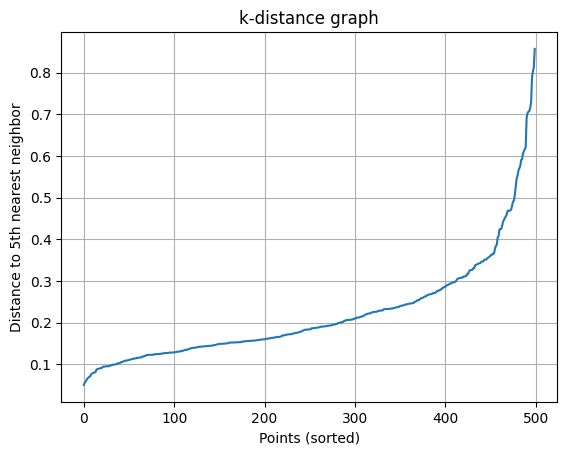

In [ ]:
k = 4  # jeśli min_samples = 4
nbrs = NearestNeighbors(n_neighbors=k + 1).fit(X1)
distances, indices = nbrs.kneighbors(X1)

# bierzemy odległość do k-tego najbliższego (czyli 4-tego sąsiada)
k_distances = distances[:, k]
k_distances = np.sort(k_distances)

# wykres
plt.plot(k_distances)
plt.ylabel(f'Distance to {k + 1}th nearest neighbor')
plt.xlabel('Points (sorted)')
plt.title('k-distance graph')
plt.grid()
plt.show()

ZBIÓR 1 - Kuliste klastry
K-means ARI: 1.0
DBSCAN ARI: 0.9728527094855587


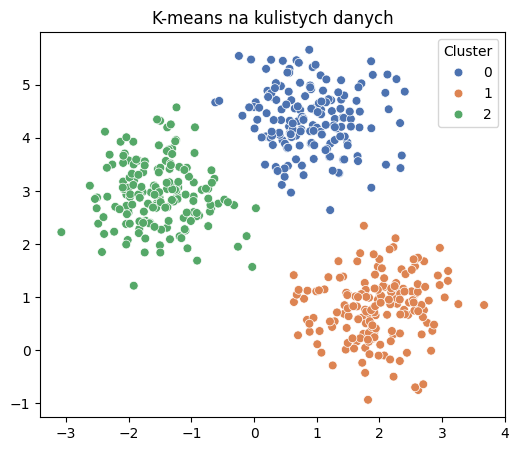

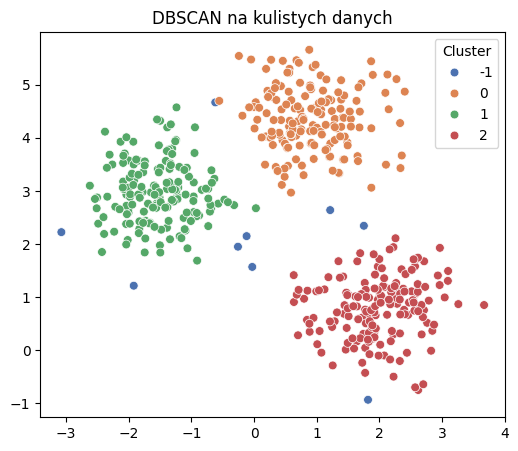

In [ ]:
# K-means
kmeans1 = KMeans(n_clusters=3, random_state=0)
labels_kmeans1 = kmeans1.fit_predict(X1)

# DBSCAN
dbscan1 = DBSCAN(eps=0.5, min_samples=5)
labels_dbscan1 = dbscan1.fit_predict(X1)

# ARI (jakość grupowania)
print("ZBIÓR 1 - Kuliste klastry")
print("K-means ARI:", adjusted_rand_score(y1_true, labels_kmeans1))
print("DBSCAN ARI:", adjusted_rand_score(y1_true, labels_dbscan1))

# Wizualizacja
plot_clusters(X1, labels_kmeans1, "K-means na kulistych danych")
plot_clusters(X1, labels_dbscan1, "DBSCAN na kulistych danych")

K-means Świetnie dopasowuje klastry – zakłada kulisty kształt. Wysoka jakość grupowania.

DBSCAN	Działa poprawnie, ale wymaga starannego doboru eps. Może potraktować część punktów jako szum, jeśli są bardziej rozproszone.

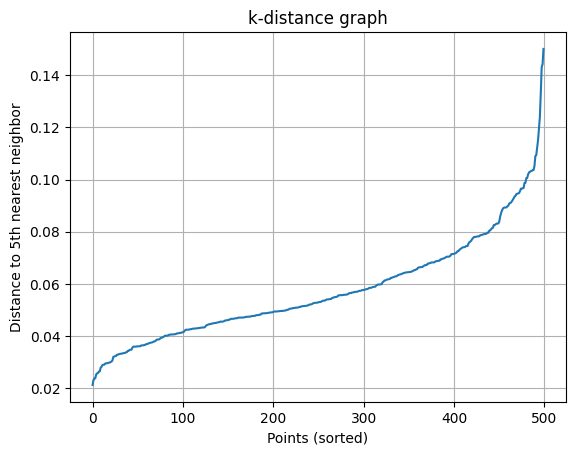

In [ ]:
k = 4  # jeśli min_samples = 4
nbrs = NearestNeighbors(n_neighbors=k + 1).fit(X2)
distances, indices = nbrs.kneighbors(X2)

# bierzemy odległość do k-tego najbliższego (czyli 4-tego sąsiada)
k_distances = distances[:, k]
k_distances = np.sort(k_distances)

# wykres
plt.plot(k_distances)
plt.ylabel(f'Distance to {k + 1}th nearest neighbor')
plt.xlabel('Points (sorted)')
plt.title('k-distance graph')
plt.grid()
plt.show()

ZBIÓR 2 - Nieliniowe klastry (księżyce)
K-means ARI: 0.26893493975903615
DBSCAN ARI: 0.9920479375350045


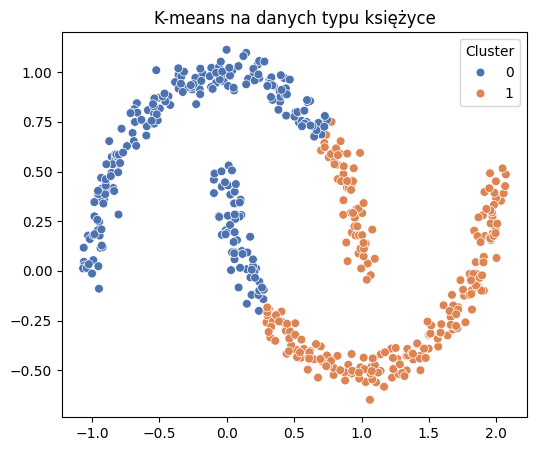

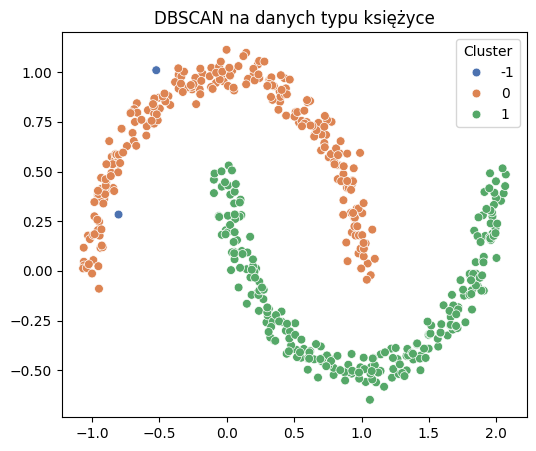

In [ ]:
# K-means
kmeans2 = KMeans(n_clusters=2, random_state=0)
labels_kmeans2 = kmeans2.fit_predict(X2)

# DBSCAN
dbscan2 = DBSCAN(eps=0.11, min_samples=5)
labels_dbscan2 = dbscan2.fit_predict(X2)

# ARI
print("ZBIÓR 2 - Nieliniowe klastry (księżyce)")
print("K-means ARI:", adjusted_rand_score(y2_true, labels_kmeans2))
print("DBSCAN ARI:", adjusted_rand_score(y2_true, labels_dbscan2))

# Wizualizacja
plot_clusters(X2, labels_kmeans2, "K-means na danych typu księżyce")
plot_clusters(X2, labels_dbscan2, "DBSCAN na danych typu księżyce")

K-means Źle dopasowuje – próbuje przeciąć księżyce „w poprzek” i dzieli przestrzeń liniowo.

DBSCAN Bardzo dobre dopasowanie – wykrywa zakrzywione kształty i oddziela klastry poprawnie.

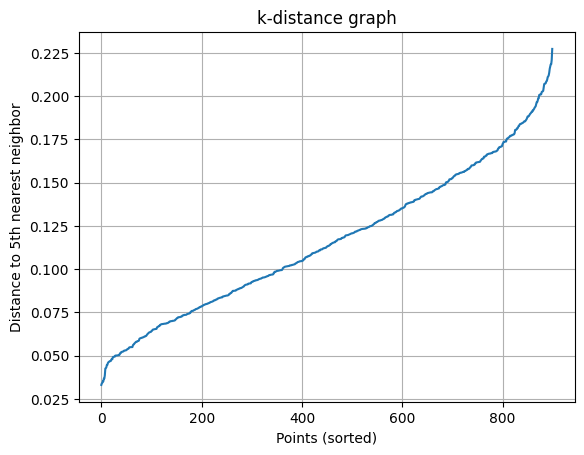

In [ ]:
k = 4  # jeśli min_samples = 4
nbrs = NearestNeighbors(n_neighbors=k + 1).fit(X)
distances, indices = nbrs.kneighbors(X)

# bierzemy odległość do k-tego najbliższego (czyli 4-tego sąsiada)
k_distances = distances[:, k]
k_distances = np.sort(k_distances)

# wykres
plt.plot(k_distances)
plt.ylabel(f'Distance to {k + 1}th nearest neighbor')
plt.xlabel('Points (sorted)')
plt.title('k-distance graph')
plt.grid()
plt.show()

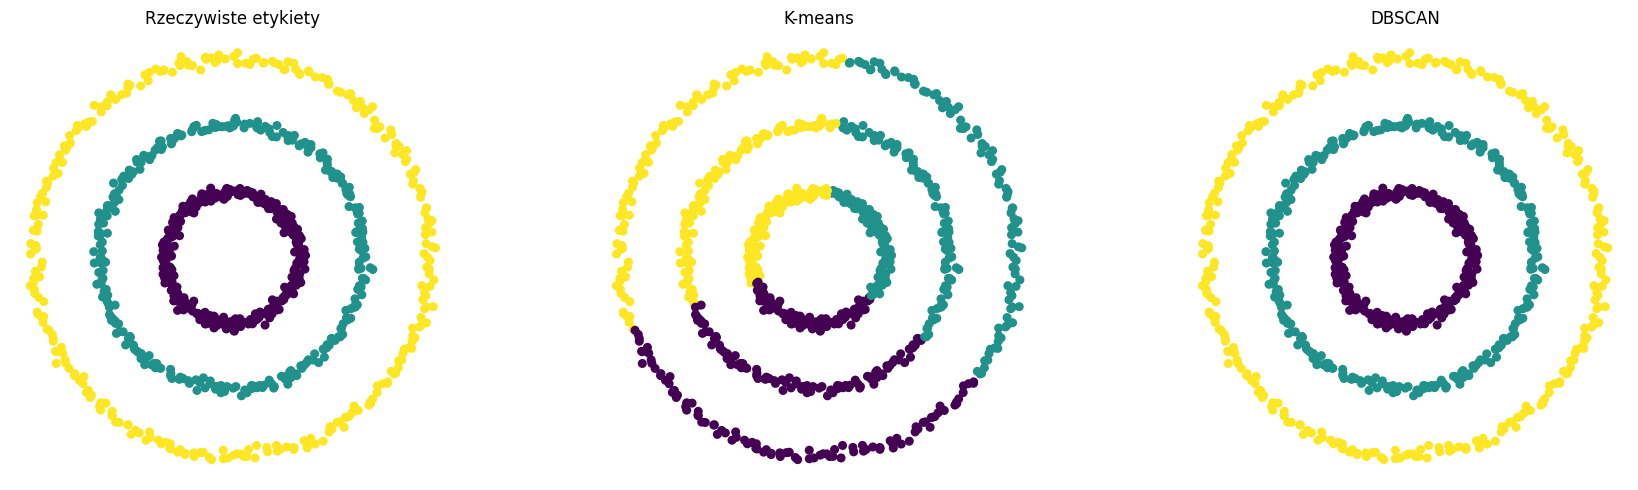

In [ ]:
# --- 2. K-means ---
kmeans = KMeans(n_clusters=3, random_state=0)
labels_kmeans = kmeans.fit_predict(X)

# --- 3. DBSCAN ---
dbscan = DBSCAN(eps=0.3, min_samples=4)
labels_dbscan = dbscan.fit_predict(X)

# --- 4. Wizualizacja ---
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

axs[0].scatter(X[:, 0], X[:, 1], c=y_true, cmap='viridis', s=30)
axs[0].set_title("Rzeczywiste etykiety")

axs[1].scatter(X[:, 0], X[:, 1], c=labels_kmeans, cmap='viridis', s=30)
axs[1].set_title("K-means")

axs[2].scatter(X[:, 0], X[:, 1], c=labels_dbscan, cmap='viridis', s=30)
axs[2].set_title("DBSCAN")

for ax in axs:
    ax.set_aspect("equal")
    ax.axis('off')

plt.tight_layout()
plt.show()

K-means	dzieli dane "wzdłuż promienia", nie rozpozna pierścieni – bo zakłada klastry o kształcie kulistym.

DBSCAN	Skutecznie wykryje 3 pierścienie jako osobne klastry (jeśli dobrze dobrano eps).

## Algorytm K-Średnich

In [ ]:
import numpy as np
import pandas as pd
import statistics
import copy
import xlrd as xd
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn import metrics
from sklearn.metrics import accuracy_score

Wczytanie danych wejściowych

In [ ]:
def read_data():
  df = pd.read_csv('/content/grains.csv', delimiter=r";")
  return df

Wykres punktowy danych

In [ ]:
def data_plot(df):
  sns.scatterplot(x='x', y='y', data=df, hue="target")
  plt.show()

Losowanie początkowych centroidów

In [ ]:
def choose_centr(k, s, x_min, x_max, y_min, y_max):
  np.random.seed(s)
  centroids = {}
  for i in range(k):
    centroids[i+1]=[np.random.randint(x_min,x_max), np.random.randint(y_min, y_max)]
  return centroids

Przypisanie punktów do klastrów

In [ ]:
def assignment(df, centroids):
  for i in centroids.keys():
    df['distance_from_{}'.format(i)] = (df['x'] - centroids[i][0]) ** 2 + (df['y'] - centroids[i][1]) ** 2
  centroid_distance_cols = ['distance_from_{}'.format(i) for i in centroids.keys()]
  df['closest'] = df.loc[:, centroid_distance_cols].idxmin(axis=1)
  df['closest'] = df['closest'].map(lambda x: int(x.lstrip('distance_from_')))
  df['color'] = df['closest'].map(lambda x: colmap[x])
  return df

Wyznaczanie nowych centroidów

In [ ]:
def update(centroids):
  for i in centroids.keys():
    centroids[i][0] = np.mean(df[df['closest'] == i]['x'])
    centroids[i][1] = np.mean(df[df['closest'] == i]['y'])
  return centroids

Algorytm k-średnich

In [ ]:
def k_clusters(df, centroids):
  while True:
    closest_centroids = df['closest'].copy(deep=True)
    centroids = update(centroids)
    df = assignment(df, centroids)
    if closest_centroids.equals(df['closest']):
      return df

Wykres z wyróżnionymi klastrami

In [ ]:
def show_clusters(df, centroids):
  fig = plt.figure(figsize=(5, 5))
  plt.scatter(df['x'],dff['y'],color=df['color'],alpha=0.5,edgecolor='k')
  for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
  plt.show()

Zadanie 2c


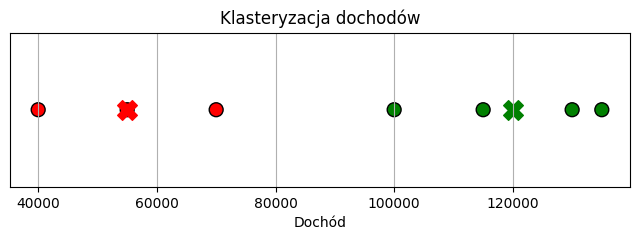

Klaster 1 (kolor r):
[40000, 55000, 70000]
Centroid: 55000.0
Klaster 2 (kolor g):
[100000, 115000, 130000, 135000]
Centroid: 120000.0


In [ ]:
# Kolory dla klastrów
colmap = {1: 'r', 2: 'g'}

# Dane (jednowymiarowe dochody)
data_1d = [40000, 55000, 70000, 100000, 115000, 130000, 135000]

# Tworzymy DataFrame w 2D z y = 0
df = pd.DataFrame({'x': data_1d, 'y': [0] * len(data_1d)})

# Ręcznie ustawiamy centroidy: 70000 i 135000, y = 0
centroids = {
    1: [70000, 0],
    2: [135000, 0]
}

# Funkcja przypisania punktów do centroidów
def assignment(df, centroids):
    for i in centroids.keys():
        df['distance_from_{}'.format(i)] = (
            (df['x'] - centroids[i][0]) ** 2 + (df['y'] - centroids[i][1]) ** 2
        )
    centroid_distance_cols = ['distance_from_{}'.format(i) for i in centroids.keys()]
    df['closest'] = df.loc[:, centroid_distance_cols].idxmin(axis=1)
    df['closest'] = df['closest'].map(lambda x: int(x.lstrip('distance_from_')))
    df['color'] = df['closest'].map(lambda x: colmap[x])
    return df

# Aktualizacja centroidów
def update(df, centroids):
    for i in centroids.keys():
        centroids[i][0] = np.mean(df[df['closest'] == i]['x'])
        centroids[i][1] = np.mean(df[df['closest'] == i]['y'])
    return centroids

# Główna pętla
def k_clusters(df, centroids):
    while True:
        closest_centroids = df['closest'].copy(deep=True) if 'closest' in df else None
        centroids = update(df, centroids)
        df = assignment(df, centroids)
        if closest_centroids is not None and closest_centroids.equals(df['closest']):
            return df, centroids

# Pierwsze przypisanie
df = assignment(df, centroids)

# Uruchomienie algorytmu
df_result, final_centroids = k_clusters(df, centroids)

# Wyświetlenie końcowych klastrów
def show_clusters(df, centroids):
    plt.figure(figsize=(8, 2))
    plt.scatter(df['x'], df['y'], c=df['color'], edgecolor='k', s=100)
    for i in centroids.keys():
        plt.scatter(*centroids[i], color=colmap[i], s=200, marker='X')
    plt.title("Klasteryzacja dochodów")
    plt.xlabel("Dochód")
    plt.yticks([])
    plt.grid(True)
    plt.show()

show_clusters(df_result, final_centroids)

# Wyniki tekstowe
for i in centroids.keys():
    print(f"Klaster {i} (kolor {colmap[i]}):")
    print(df_result[df_result['closest'] == i]['x'].tolist())
    print(f"Centroid: {final_centroids[i][0]}")

Zadanie 2d

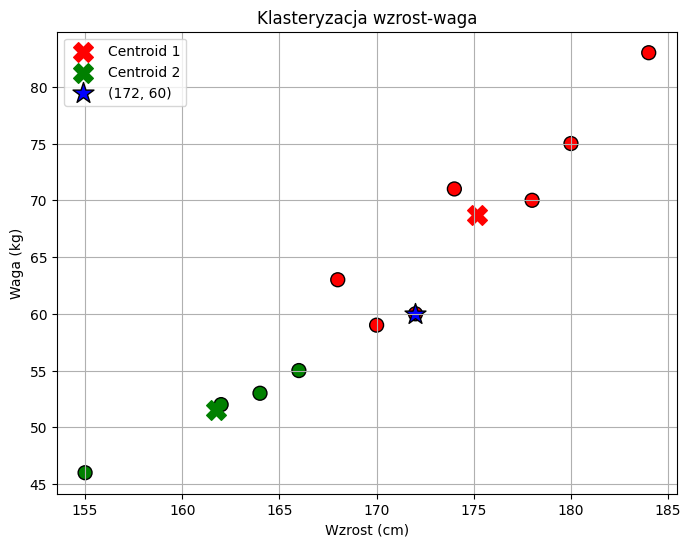

Punkt (172, 60) został przypisany do klastra 1.
Prognozowana płeć: M


In [ ]:
# Dane: wzrost, waga, płeć
heights = [180, 174, 184, 168, 178, 170, 164, 155, 162, 166, 172]
weights = [75, 71, 83, 63, 70, 59, 53, 46, 52, 55, 60]
genders = ['M', 'M', 'M', 'M', 'M', 'K', 'K', 'K', 'K', 'K', '?']

# Tworzymy DataFrame
df = pd.DataFrame({'height': heights, 'weight': weights, 'gender': genders})

# Punkt testowy
test_point = np.array([172, 60])

# Początkowe centroidy: C1 zadany, C2 = najbardziej odległy punkt
C1 = np.array([180, 75])
distances = np.sqrt(((df[['height', 'weight']] - C1)**2).sum(axis=1))
C2 = df.loc[distances.idxmax(), ['height', 'weight']].values

centroids = {
    1: C1,
    2: C2
}

# Kolory dla wykresu
colmap = {1: 'r', 2: 'g'}

# Funkcja przypisania punktów do klastrów
def assign_clusters(df, centroids):
    for i in centroids:
        df[f'dist_{i}'] = np.sqrt((df['height'] - centroids[i][0])**2 + (df['weight'] - centroids[i][1])**2)
    df['closest'] = df[[f'dist_{i}' for i in centroids]].idxmin(axis=1).apply(lambda x: int(x[-1]))
    df['color'] = df['closest'].map(colmap)
    return df

# Aktualizacja centroidów
def update_centroids(df, centroids):
    for i in centroids:
        points = df[df['closest'] == i][['height', 'weight']]
        if not points.empty:
            centroids[i] = points.mean().values
    return centroids

# Algorytm K-średnich
def k_means(df, centroids):
    df = assign_clusters(df, centroids)
    while True:
        old_closest = df['closest'].copy()
        centroids = update_centroids(df, centroids)
        df = assign_clusters(df, centroids)
        if old_closest.equals(df['closest']):
            break
    return df, centroids

# Uruchamiamy algorytm
df_result, final_centroids = k_means(df.copy(), centroids)

# Wykres końcowy
plt.figure(figsize=(8, 6))
plt.scatter(df_result['height'], df_result['weight'], color=df_result['color'], edgecolor='k', s=100)
for i in final_centroids:
    plt.scatter(*final_centroids[i], color=colmap[i], marker='X', s=200, label=f'Centroid {i}')
plt.scatter(*test_point, color='blue', edgecolor='k', marker='*', s=250, label='(172, 60)')
plt.title("Klasteryzacja wzrost-waga")
plt.xlabel("Wzrost (cm)")
plt.ylabel("Waga (kg)")
plt.legend()
plt.grid(True)
plt.show()

# Przypisanie punktu testowego do klastra
test_distances = {i: np.linalg.norm(test_point - final_centroids[i]) for i in final_centroids}
test_cluster = min(test_distances, key=test_distances.get)

# Prognozowana płeć = dominująca w klastrze
cluster_members = df_result[df_result['closest'] == test_cluster]
gender_prediction = cluster_members[cluster_members['gender'] != '?']['gender'].mode()[0]

print(f"Punkt (172, 60) został przypisany do klastra {test_cluster}.")
print(f"Prognozowana płeć: {gender_prediction}")